In [1]:
import os
import sys
import glob
import numpy as np
import bottleneck as bn
import pandas as pd
import bootmedian as bm # This is a custom made module available at GitHub. https://github.com/Borlaff/bootmedian
import seaborn as sns
import aplpy
import astropy.units as u
from astropy.wcs import WCS
from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord 


SOFIA_dir="/home/borlaff/NASA/SOFIA/"
sys.path.append(SOFIA_dir + "MOHAWC/")
radio_wd = SOFIA_dir + "LEGACY/RADIO/Radio_ori/"
legacy_wd= SOFIA_dir + "LEGACY/SLR_DR1_20210831/HAWC/"
work_dir = SOFIA_dir + "LEGACY/WORK_ZONE/"
from mohawc import *
name_list = ["cenA", "circinus", "NGC253", "M51", "M82", "M83", "NGC1068", "NGC1097", "NGC2146",
            "NGC3627", "NGC4736", "NGC4826", "NGC6946", "NGC7331"]



#####
# Galaxy constants
#####

# Centaurus A 
cenA_center = [201.365063, -43.019113]
cenA_pa = 114
cenA_dpa = 14
cenA_incl = 83
cenA_dincl = 6
cenA_dist = 3.42 # Mpc

# Circinus
circinus_center = [213.29130,-65.33926] # For, Koribalski, Jarrett et al. 2012
circinus_incl = 40 # For, Koribalski, Jarrett et al. 2012
circinus_dincl = 10
circinus_pa = 205 # For, Koribalski, Jarrett et al. 2012
circinus_dpa = 10
circinus_dist = 4.20

# NGC253 
ngc253_center = [11.888002, -25.288220]
ngc253_pa = 52
ngc253_dpa = 1
ngc253_incl = 78.3
ngc253_dincl = 1
ngc253_dist = 3.5 # Mpc
ngc253_ddist = 0.1


# M51 
m51_incl = 22.0
m51_dincl = 5.0
m51_pa = 7.0  
m51_dpa = 3.0
m51_nbins = 14
m51_center = [202.4698899, +47.1952002]
m51_dist = 8.58 # Mpc

# M82 
m82_center = [148.969687, 69.679383]
m82_pa = 64
m82_dpa = 1
m82_incl = 76
m82_dincl = 1
m82_dist = 3.85 # Mpc

# M83
m83_center = [204.253958, -29.865417]
m83_pa = 226 # Foyle et al. 2012 
m83_dpa = 5
m83_incl = 25 # Coyle 1981
m83_dincl = 5
m83_dist = 4.66 # Mpc

# NGC1068
ngc1068_center = [40.669629, -0.013281]
ngc1068_pa = 360-286
ngc1068_dpa = 5 # Das et al. 2006
ngc1068_incl = 40 
ngc1068_dincl = 3
ngc1068_dist = 14.40 # Mpc

# NGC1097
ngc1097_center = [41.579375, -30.274889] # Sheth et al 2010
ngc1097_pa = 133.0
ngc1097_dpa = 0.1
ngc1097_incl =  41.7
ngc1097_dincl =  0.6
ngc1097_dist = 19.10 # Mpc


# NGC2146
ngc2146_center = [94.657125, 78.357028]
ngc2146_pa = 140 # Sanchez-Portal+ 2000
ngc2146_dpa = 2 
ngc2146_incl = 63
ngc2146_dincl = 2
ngc2146_dist = 17.20 # Mpc

# NGC3627
ngc3627_center = [170.062351, 12.991538]
ngc3627_pa = 176
ngc3627_dpa = 1
ngc3627_incl = 52
ngc3627_dincl = 1
ngc3627_dist = 8.90 # Mpc

# NGC4736 
ngc4736_center = [192.721088, 41.120458]
ngc4736_pa = 292
ngc4736_dpa = 2 
ngc4736_incl = 36
ngc4736_dincl = 7
ngc4736_dist = 5.3
ngc4736_ddist = 0.1


# NGC4826
ngc4826_center = [194.181837, 21.682970]
ngc4826_pa = 125
ngc4826_dpa = 5
ngc4826_incl = 65
ngc4826_dincl = 5
ngc4826_dist = 5.60 # dist

# NGC6946
ngc6946_center = [308.718015, 60.153915]
ngc6946_pa = 239
ngc6946_dpa = 1 # Kuno+2007
ngc6946_incl = 38.4 # Kuno+2007
ngc6946_dincl = 3.0 # Kuno+2007
ngc6946_dist = 6.80 # dist

# NGC7331
ngc7331_center = [339.266724, 34.415519]
ngc7331_pa = 165
ngc7331_dpa = 1.2 
ngc7331_incl = 78.1
ngc7331_dincl = 2.7
ngc7331_dist = 15.7 # Mpc



SNR_galaxies = ascii.read(SOFIA_dir + "LEGACY/DR1_20210103/Data/galaxies.lst", delimiter=',')
SNR_galaxies

Astrobox v.1.0
Astronomy Imaging Tool Box - A box of usual tools for astronomical imaging processing
Author: Alejandro S. Borlaff - NASA Ames Research Center - a.s.borlaff@nasa.gov / asborlaff@gmail.com


<Table length=25>
    name     band   object   ... steps_PI  vmin_I  vmax_I
   str11    int64   str10    ...  int64   float64 float64
----------- ----- ---------- ... -------- ------- -------
Centaurus A    89       CenA ...        1   0.003     0.2
   Circinus    53 Circinus_A ...        1    0.06     0.8
   Circinus    89 Circinus_C ...        5   0.001     0.5
   Circinus   214 Circinus_E ...        1  0.0005     0.1
        M51   154        M51 ...        1  0.0005    0.05
        M82    53      M82_A ...        5    0.02     0.6
        ...   ...        ... ...      ...     ...     ...
   NGC 2146   154  NGC2146_D ...        1   0.001    0.16
   NGC 2146   214  NGC2146_E ...        1  0.0005    0.05
   NGC 3627   154    NGC3627 ...        1  0.0005    0.05
   NGC 4736   154    NGC4736 ...        1  0.0005    0.05
   NGC 4826    89    NGC4826 ...        1  0.0005    0.05
   NGC 6946   154    NGC6946 ...        1  0.0005    0.05
   NGC 7331   154    NGC7331 ...        1  0.0005    0.05

In [2]:
galaxy_name = "NGC4736"
HAWC_band = "D"
radio_band = "6cm"


def plot_polarization_comparison(pol1, hdu_pol1, pol2, hdu_pol2, back, hdu_back, 
                                 quality_mask_1=None, quality_mask_2=None, 
                                 step=1, linewidth=1, scalevec = 2.5, header=None, save_fig="plot_pitch_model.pdf",
                                 vmin=None, vmax=None, vmid=None,
                                 pol_fraction=None, title=" ", colorscale="viridis",
                                 color_1="red", color_2="black", alpha_1=1, alpha_2=1, recenter=None,
                                 figsize=6.5, colorbar_label=r'Intensity (Jy arcsec$^{-2}$)', pixscale=None,
                                 rotate_1=0, rotate_2=0, scalebar=None, scalebar_label="Default", relative_size=1.0):
    single_plot = False
    
    if pol2 is None:
        single_plot = True
        pol2 = pol1
        hdu_pol2 = hdu_pol1
        quality_mask_2 = quality_mask_1
        alpha_2 = 0 

    pol1_fits = fits.open(pol1)
    pol1_data = pol1_fits[hdu_pol1].data
    pol1_header = pol1_fits[hdu_pol1].header    
    pol2_fits = fits.open(pol2)
    pol2_data = pol2_fits[hdu_pol2].data
    pol2_header = pol2_fits[hdu_pol2].header    
    back_fits = fits.open(back)
    back_data = back_fits[hdu_back].data
    back_header = back_fits[hdu_back].header  
    
    # Quality mask should be implemented in the files before executing the command
    if quality_mask_1 is None:
        quality_mask_1 = np.full(pol1_data.shape, 1.0)
        quality_mask_1[np.isnan(pol1_data)] = 0
        
    if quality_mask_2 is None:
        quality_mask_2 = np.full(pol1_data.shape, 1.0)
        quality_mask_2[np.isnan(pol2_data)] = 0
        
    vector_scale_1 = np.full(quality_mask_1.shape, 1.0)
    vector_scale_2 = np.full(quality_mask_2.shape, 1.0)

    vector_scale_1[quality_mask_1==0] = np.nan
    vector_scale_2[quality_mask_2==0] = np.nan

    if pol_fraction is not None:
        vector_scale = vector_scale * pol_fraction

    save_fits(vector_scale_1, "vector_scale_1.fits", pol1_header)
    save_fits(vector_scale_2, "vector_scale_2.fits", pol1_header)

    vec_legend = 5


    # Plot zone
    fig = plt.figure(figsize=(figsize,figsize))
    gc = aplpy.FITSFigure(back, figure=fig)
    #gc.show_grayscale()
    #gc.show_colorscale(cmap='gist_heat', vmin=32.25, vmax=30)

    #if header != None:
    # gc.add_scalebar(1/60, "1 arcmin", color='black', corner='bottom left', lw=4)

    gc.show_vectors(pdata="vector_scale_1.fits", phdu=0, adata=pol1, ahdu=hdu_pol1,
                    linewidth=linewidth, step=step, scale=scalevec, color=color_1, alpha=alpha_1, rotate=rotate_1)

    gc.show_vectors(pdata="vector_scale_2.fits", phdu=0, adata=pol2, ahdu=hdu_pol2,
                    linewidth=relative_size*linewidth, step=step, scale=relative_size*scalevec, color=color_2, alpha=alpha_2, rotate=rotate_2)


    gc.show_colorscale(cmap=colorscale, vmin=vmin, vmax=vmax, vmid=vmid, stretch='log', aspect="equal")
    # Get the current axis
    #ax = plt.gca()
    # Get the images on an axis
    #im = ax.images
    # Assume colorbar was plotted last one plotted last
    #cbar = im[-1].colorbar
    gc.add_colorbar()
    gc.colorbar.set_axis_label_text(colorbar_label)
    #gc.colorbar.set_powerlimits((0, 0))

    gc.set_xaxis_coord_type("scalar")
    gc.set_yaxis_coord_type("scalar")

    #legend vector
    if pixscale is None:
        pixscale = 1
    vecscale = scalevec * pixscale

    #if pol_fraction is not None:
    #    gc.add_scalebar(vec_legend*vecscale,'P ='+np.str(vec_legend)+'%',\
    #                    corner='bottom right',frame=True,color='black',facecolor='blue')
        
    if scalebar is not None:
        gc.add_scalebar(scalebar, scalebar_label, corner='bottom right', frame=True, color='black')
    #gc.add_scalebar(scalevec,'Pitch angle model',corner='bottom right',frame=True,color='red')
    #gc.set_title(title,fontsize=15)

    gc.add_label(x=0.5, y=1.04, text=title, relative=True, size=15, weight=600,
                bbox=dict(boxstyle="square",
                ec=(0.2, 0.2, 0.2),
                fc=(1.0, 0.85, 0.85),
                ))

    
    try:
        gc.add_beam(color='red')
    except:
        print("No beam size found")

    try:
        if isinstance(recenter, (list,np.ndarray)):
            gc.recenter(x=recenter[0], y=recenter[1], width=recenter[2], height=recenter[3])
    except:
        print("Can't recenter, check WCS")

    fig.subplots_adjust(top=0.6)     # Add space at top
    plt.savefig(save_fig, dpi=300, bbox_inches='tight')
    os.system("rm vector_scale_1.fits")
    os.system("rm vector_scale_2.fits")


In [3]:
# Centaurus A 89              - -                                  DONE
# Circinus 53, 89, 214        - -                                  DONE
# M51 154                     3, 6 Fletcher et al. (2011)          DONE
# M82 53, 89, 154, 214        3, 6 Adebahr et al. (2013, 2017)     DONE
# M83 154                     6 Frick et al. (2016b)
# NGC 253  89, 154            3, 6 Heesen et al. (2011)
# NGC 1068 53, 89             - -
# NGC 1097 89, 154            3, 6 Beck et al. (2005)
# NGC 2146 53, 89, 154, 214   - -
# NGC 3627 154                3, 6 Soida et al. (2001)
# NGC 4736 154                3, 6 Chy ̇zy & Buta (2008)
# NGC 4826 89                 - -
# NGC 6946 154                6 Beck (1991, 2007)
# NGC 7331 154                - -

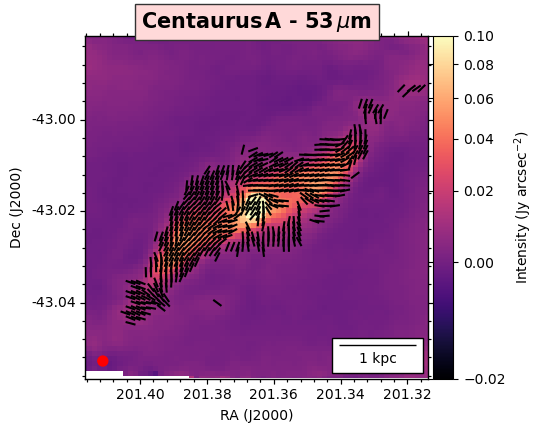

In [4]:
### CEN A ### A - BAND
title = r'Centaurus$\,$A - 53$\,\mu$m'
save_fig = "CenA_53um.png"
center = cenA_center
dist = cenA_dist
FOV = 4.5 # arcmin
quality_mask_1 = fits.open(work_dir + "CenA_C_quality_cut.fits")[0].data
quality_mask_2 = None
vmin = -0.02
vmax = 0.1
vmid = -0.05
pol1 = legacy_wd + "CenA_C_jyarcsec2.fits"
hdu_pol1 = 10
pol2 = None
hdu_pol2 = None
back = pol1
hdu_back = 0 
figsize = 7

recenter = [center[0], center[1], FOV/60, FOV/60]
kpc_scalebar = (180*60*60/np.pi)/(dist*1000) # in arcsec/kpc

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 1,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=90, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)

rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory
rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory
rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory


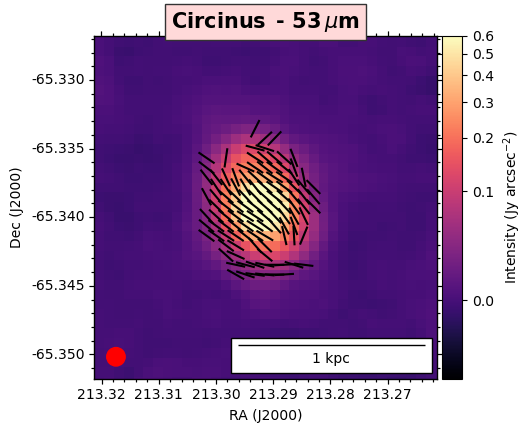

In [5]:
### Circinus ### A - BAND
title = r'Circinus$\,$ - 53$\,\mu$m'
save_fig = "Circinus_53um.png"
center = circinus_center
dist = circinus_dist
FOV = 1.5 # arcmin
quality_mask_1 = fits.open(work_dir + "Circinus_A_quality_cut.fits")[0].data
quality_mask_2 = None
vmin = -0.03
vmax = 0.6
vmid = -0.06
pol1 = legacy_wd + "Circinus_A_jyarcsec2.fits"
hdu_pol1 = 10
pol2 = None
hdu_pol2 = None
back = pol1
hdu_back = 0 
figsize = 7

recenter = [center[0], center[1], FOV/60, FOV/60]
kpc_scalebar = (180*60*60/np.pi)/(dist*1000) # in arcsec/kpc

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 1,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=90, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)

### Circinus ### C - BAND
title = r'Circinus$\,$ - 89$\,\mu$m'
save_fig = "Circinus_89um.png"
quality_mask_1 = fits.open(work_dir + "Circinus_C_quality_cut.fits")[0].data
pol1 = legacy_wd + "Circinus_C_jyarcsec2.fits"
back = pol1
vmin = -0.02
vmax = 0.3
vmid = -0.045
FOV = 2.5 # arcmin

recenter = [center[0], center[1], FOV/60, FOV/60]

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 1,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=90, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)

### Circinus ### D - BAND
title = r'Circinus$\,$ - 214$\,\mu$m'
save_fig = "Circinus_214um.png"
vmin = -0.002
vmax = 0.007
vmid = -0.007
quality_mask_1 = fits.open(work_dir + "Circinus_E_quality_cut.fits")[0].data
pol1 = legacy_wd + "Circinus_E_jyarcsec2.fits"
back = pol1
FOV = 5.5 # arcmin
recenter = [center[0], center[1], FOV/60, FOV/60]

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 1,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=90, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)

rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory


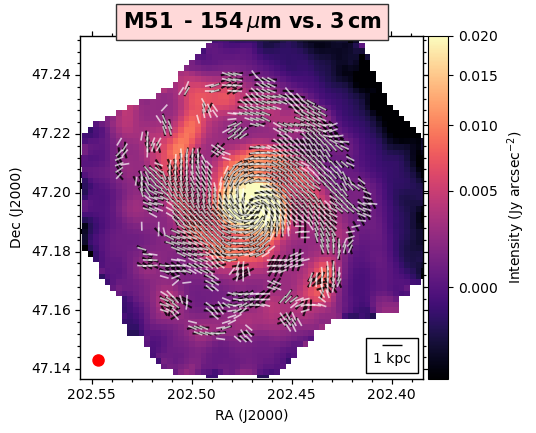

In [6]:
### M51 ### D - BAND
title = r'M51$\,$ - 154$\,\mu$m vs. 3$\,$cm'
save_fig = "M51_154um_vs_3cm.png"
center = m51_center
dist = m51_dist
FOV = 7 # arcmin

vmin = -0.003
vmax = 0.02
vmid = -0.01
pol1 = radio_wd + "M51_3cm_8arcsec_fix_jyarcsec2_convol_hawc_D_radio_masked.fits"
hdu_pol1 = 10
pol2 =  legacy_wd + "M51_D_jyarcsec2.fits"
hdu_pol2 = 10
back = pol2
hdu_back = 0 
figsize = 7
quality_mask_1 = fits.open(pol1)[0].data
quality_mask_2 = fits.open(work_dir + "M51_D_quality_cut.fits")[0].data
recenter = [center[0], center[1], FOV/60, FOV/60]
kpc_scalebar = (180*60*60/np.pi)/(dist*1000) # in arcsec/kpc

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 0.8,
                             color_2 = "white", alpha_2 = 0.7,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=0, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)

rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory
rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory
rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory
rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory


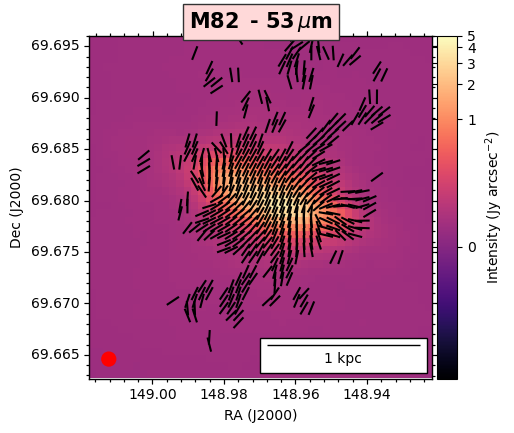

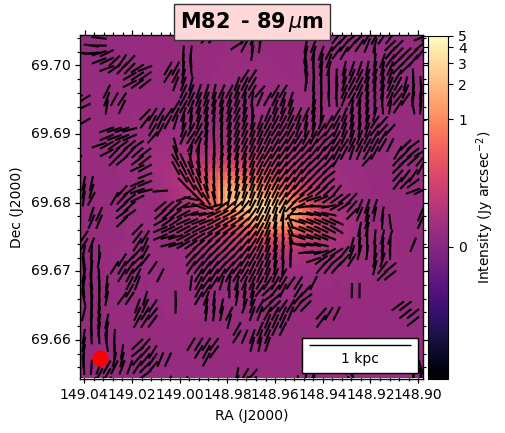

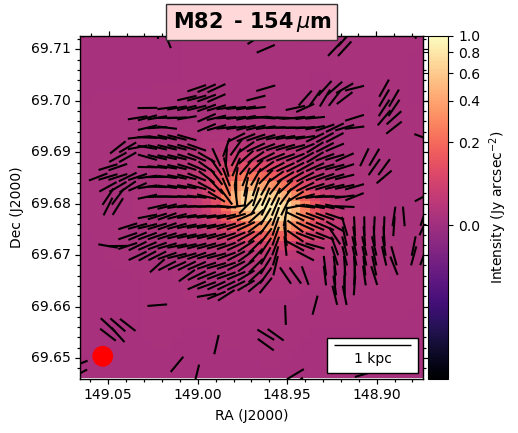

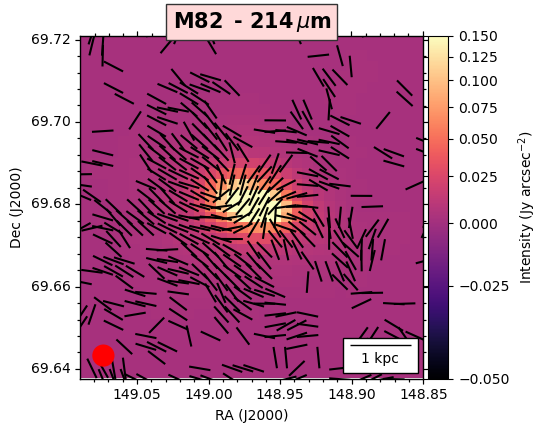

In [7]:
### M82 ###  # M82 53, 89, 154, 214   
title = r'M82$\,$ - 53$\,\mu$m'
save_fig = "M82_53um.png"
center = m82_center
dist = m82_dist
FOV = 2 # arcmin
quality_mask_1 = fits.open(work_dir + "M82_A_quality_cut.fits")[0].data
quality_mask_2 = None # fits.open("/Users/aborlaff/NASA/SOFIA/LEGACY/WORK_ZONE/M51_3cm_quality_cut.fits")[0].data
vmin = -0.1
vmax = 5.0
vmid = -0.11
pol1 = legacy_wd + "M82_A_jyarcsec2.fits"
hdu_pol1 = 10 # 4
pol2 = None #  "/Users/aborlaff/NASA/SOFIA/LEGACY/DR1_20210103/Data/M51_D.fits"
hdu_pol2 = None # 10
back = pol1 #pol2
hdu_back = 0 
figsize = 7

recenter = [center[0], center[1], FOV/60, FOV/60]
kpc_scalebar = (180*60*60/np.pi)/(dist*1000) # in arcsec/kpc

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 0.8,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=90, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)


########## M82 
title = r'M82$\,$ - 89$\,\mu$m'
save_fig = "M82_89um.png"
quality_mask_1 = fits.open(work_dir + "M82_C_quality_cut.fits")[0].data
pol1 = legacy_wd + "M82_C_jyarcsec2.fits"
back = pol1 #pol2
FOV = 3 # arcmin
recenter = [center[0], center[1], FOV/60, FOV/60]

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 0.8,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=90, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)


########## M82 
title = r'M82$\,$ - 154$\,\mu$m'
save_fig = "M82_154um.png"
quality_mask_1 = fits.open(work_dir + "M82_D_quality_cut.fits")[0].data
pol1 = legacy_wd + "M82_D_jyarcsec2.fits"
back = pol1 #pol2
FOV = 4 # arcmin
vmin = -0.1
vmax = 1.00
vmid = -0.12
recenter = [center[0], center[1], FOV/60, FOV/60]

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 0.8,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=90, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)

########## M82 
title = r'M82$\,$ - 214$\,\mu$m'
save_fig = "M82_214um.png"
quality_mask_1 = fits.open(work_dir + "M82_E_quality_cut.fits")[0].data
pol1 = legacy_wd + "M82_E_jyarcsec2.fits"
back = pol1 #pol2
FOV = 5 # arcmin
vmin = -0.05
vmax = 0.15
vmid = -0.1
recenter = [center[0], center[1], FOV/60, FOV/60]

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 0.8,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=90, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)

In [8]:
# M83 154                     6 Frick et al. (2016b)
### M83 ### D - BAND
title = r'M83$\,$ - 154$\,\mu$m vs. 6$\,$cm'
save_fig = "M83_154um_vs_6cm.png"
center = m83_center
dist = m83_dist
FOV = 7 # arcmin
vmin = -0.0022
vmax = 0.0085
vmid = -0.1
pol1 = radio_wd + "M83_6cm_10arcsec_fix_jyarcsec2_convol_hawc_D_radio_masked.fits"
hdu_pol1 = 10
pol2 = legacy_wd + "M83_D_jyarcsec2.fits"
hdu_pol2 = 10
back = pol2
hdu_back = 0 
figsize = 7
quality_mask_1 = fits.open(pol1)[0].data
quality_mask_2 = fits.open(work_dir + "M83_D_quality_cut.fits")[0].data
recenter = [center[0], center[1], FOV/60, FOV/60]
kpc_scalebar = (180*60*60/np.pi)/(dist*1000) # in arcsec/kpc

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 0.8,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=0, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)

rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory


In [9]:
# NGC 253  89, 154            3, 6 Heesen et al. (2011)
title = r'NGC$\,$253 - 89$\,\mu$m vs. 3$\,$cm'
save_fig = "NGC253_89um_vs_3cm.png"
center = ngc253_center
dist = ngc253_dist
FOV = 4 # arcmin

vmin = -0.01
vmax = 0.1
vmid = -0.05
pol1 = radio_wd + "NGC253_3cm_7arcsec_fix_jyarcsec2_convol_hawc_C_radio_masked.fits"
hdu_pol1 = 10
pol2 = legacy_wd + "NGC253_C_jyarcsec2.fits"
hdu_pol2 = 10
back = pol2
hdu_back = 0 
figsize = 7

quality_mask_1 = fits.open(pol1)[0].data
quality_mask_2 = fits.open(work_dir + "NGC253_C_quality_cut.fits")[0].data

recenter = [center[0], center[1], FOV/60, FOV/60]
kpc_scalebar = (180*60*60/np.pi)/(dist*1000) # in arcsec/kpc

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 0.8,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=0, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)


########## NGC253 154 
title = r'NGC$\,$253 - 154$\,\mu$m vs. 6$\,$cm'
save_fig = "NGC253_154um_vs_3cm.png"

pol1 = radio_wd + "NGC253_3cm_7arcsec_fix_jyarcsec2_convol_hawc_D_radio_masked.fits"
hdu_pol1 = 10
pol2 = legacy_wd + "NGC253_D_jyarcsec2.fits"
hdu_pol2 = 10
back = pol2
hdu_back = 0 

quality_mask_1 = fits.open(pol1)[0].data
quality_mask_2 = fits.open(work_dir + "NGC253_D_quality_cut.fits")[0].data

recenter = [center[0], center[1], FOV/60, FOV/60]
kpc_scalebar = (180*60*60/np.pi)/(dist*1000) # in arcsec/kpc

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 0.8,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=0, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)


rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory
rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory


rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory
rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory


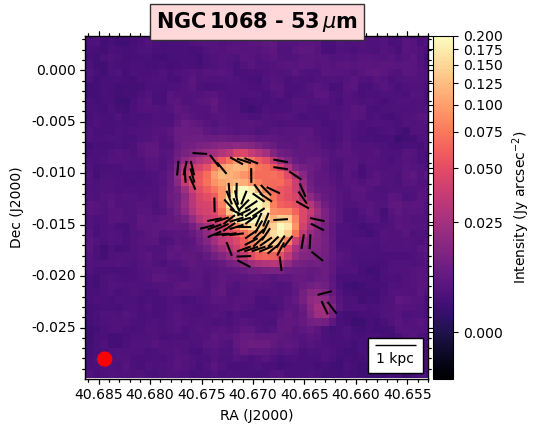

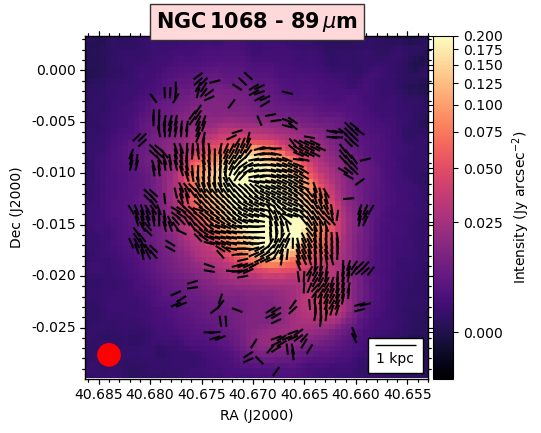

In [10]:
# NGC 1068 53, 89             - -
title = r'NGC$\,$1068 - 53$\,\mu$m'
save_fig = "NGC1068_53um.png"
center = ngc1068_center
dist = ngc1068_dist
FOV = 2 # arcmin
quality_mask_1 = fits.open(work_dir + "NGC1068_A_quality_cut.fits")[0].data
quality_mask_2 = None
vmin = -0.005
vmax = 0.2
vmid = -0.015
pol1 = legacy_wd + "NGC1068_A_jyarcsec2.fits"
hdu_pol1 = 10 # 4
pol2 = None #  "/Users/aborlaff/NASA/SOFIA/LEGACY/DR1_20210103/Data/M51_D.fits"
hdu_pol2 = None # 10
back = pol1 #pol2
hdu_back = 0 
figsize = 7

recenter = [center[0], center[1], FOV/60, FOV/60]
kpc_scalebar = (180*60*60/np.pi)/(dist*1000) # in arcsec/kpc

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 0.8,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=90, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)


########## M82 
title = r'NGC$\,$1068 - 89$\,\mu$m'
save_fig = "NGC1068_89um.png"
quality_mask_1 = fits.open(work_dir + "NGC1068_C_quality_cut.fits")[0].data
pol1 = legacy_wd + "NGC1068_C_jyarcsec2.fits"
back = pol1 #pol2
FOV = 2 # arcmin
recenter = [center[0], center[1], FOV/60, FOV/60]

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 0.8,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=90, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)



rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory
rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory


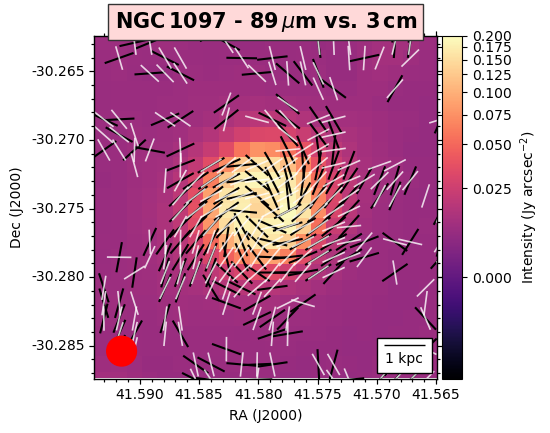

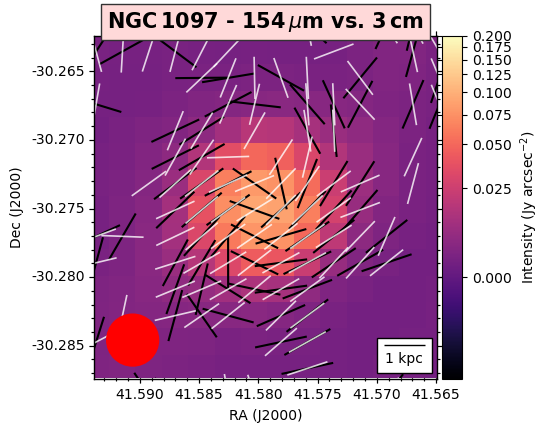

In [11]:
# NGC 1097 89, 154            3, 6 Beck et al. (2005)
title = r'NGC$\,$1097 - 89$\,\mu$m vs. 3$\,$cm'
save_fig = "NGC1097_89um_vs_3cm.png"
center = ngc1097_center
dist = ngc1097_dist
FOV = 1.5 # arcmin

vmin = -0.01
vmax = 0.2
vmid = -0.015
hdu_pol1 = 10 #4
pol1 = radio_wd + "NGC1097_3cm_6arcsec_fix_jyarcsec2_convol_hawc_C_radio_masked.fits"
pol2 = legacy_wd + "NGC1097_C_jyarcsec2.fits" # "/Users/aborlaff/NASA/SOFIA/LEGACY/RADIO/radio_conv_cut/"

hdu_pol2 = 10 
back = pol2
hdu_back = 0 
figsize = 7

quality_mask_1 = fits.open(pol1)[0].data
quality_mask_2 = fits.open(work_dir + "NGC1097_C_quality_cut.fits")[0].data # fits.open("/Users/aborlaff/NASA/SOFIA/LEGACY/WORK_ZONE/NGC1097_3cm_quality_cut.fits")[0].data

recenter = [center[0], center[1], FOV/60, FOV/60]
kpc_scalebar = (180*60*60/np.pi)/(dist*1000) # in arcsec/kpc

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 0.8,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=0, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)


########## NGC1097 
title = r'NGC$\,$1097 - 154$\,\mu$m vs. 3$\,$cm'
save_fig = "NGC1097_154um_vs_3cm.png"

FOV = 1.5 # arcmin
pol1 = radio_wd + "NGC1097_3cm_6arcsec_fix_jyarcsec2_convol_hawc_D_radio_masked.fits"
pol2 = legacy_wd + "NGC1097_D_jyarcsec2.fits" # "/Users/aborlaff/NASA/SOFIA/LEGACY/RADIO/radio_conv_cut/"
hdu_pol1 = 10 #4
hdu_pol2 = 10 
back = pol2
hdu_back = 0 
figsize = 7

quality_mask_1 = fits.open(pol1)[0].data
quality_mask_2 = fits.open(work_dir + "NGC1097_D_quality_cut.fits")[0].data # fits.open("/Users/aborlaff/NASA/SOFIA/LEGACY/WORK_ZONE/NGC1097_3cm_quality_cut.fits")[0].data

recenter = [center[0], center[1], FOV/60, FOV/60]
kpc_scalebar = (180*60*60/np.pi)/(dist*1000) # in arcsec/kpc

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 0.8,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=0, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)




In [ ]:
# NGC 2146 53, 89, 154, 214   - -
### NGC2146 ### A - BAND
title = r'NGC$\,$2146 - 53$\,\mu$m'
save_fig = "NGC2146_53um.png"
center = ngc2146_center
dist = ngc2146_dist
FOV = 2.5 # arcmin

vmin = -0.0025
vmax = 0.25
vmid = -0.005
pol1 = legacy_wd + "NGC2146_A_jyarcsec2.fits"
hdu_pol1 = 10
pol2 = None
hdu_pol2 = None
back = pol1
hdu_back = 0 
figsize = 7
quality_mask_1 = fits.open(work_dir + "NGC2146_A_quality_cut.fits")[0].data
quality_mask_2 = None
recenter = [center[0], center[1], FOV/60, FOV/60]
kpc_scalebar = (180*60*60/np.pi)/(dist*1000) # in arcsec/kpc

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 1,
                             linewidth=2.5, colorscale="magma", scalevec=1.5,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=90, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)


#######################
### NGC2146 ###  C - BAND 
title = r'NGC$\,$2146 - 89$\,\mu$m'
save_fig = "NGC2146_89um.png"
quality_mask_1 = fits.open(work_dir + "NGC2146_C_quality_cut.fits")[0].data
    
pol1 = legacy_wd + "NGC2146_C_jyarcsec2.fits"
hdu_pol1 = 10
back = pol1
hdu_back = 0 

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 1,
                             linewidth=2.5, colorscale="magma", scalevec=1.5,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=90, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)

### NGC2146 ###  D - BAND 
title = r'NGC$\,$2146 - 154$\,\mu$m'
save_fig = "NGC2146_154um.png"
quality_mask_1 = fits.open(work_dir + "NGC2146_D_quality_cut.fits")[0].data
    
pol1 = legacy_wd + "NGC2146_D_jyarcsec2.fits"
hdu_pol1 = 10
back = pol1
hdu_back = 0 

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 1,
                             linewidth=2.5, colorscale="magma", scalevec=1.5,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=90, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)

### NGC2146 ###  D - BAND 
title = r'NGC$\,$2146 - 214$\,\mu$m'
save_fig = "NGC2146_214um.png"
quality_mask_1 = fits.open(work_dir + "NGC2146_E_quality_cut.fits")[0].data
    
pol1 = legacy_wd + "NGC2146_E_jyarcsec2.fits"
hdu_pol1 = 10
back = pol1
hdu_back = 0 

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 1,
                             linewidth=2.5, colorscale="magma", scalevec=1.5,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=90, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)

rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory
rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory
rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory
rm: cannot remove 'vector_scale_1.fits': No such file or directory
rm: cannot remove 'vector_scale_2.fits': No such file or directory


In [ ]:
# NGC 3627 154                3, 6 Soida et al. (2001)
title = r'NGC$\,$3627 - 154$\,\mu$m vs. 3$\,$cm'
save_fig = "NGC3627_154um_vs_3cm.png"
center = ngc3627_center
dist = ngc3627_dist
FOV = 5.5 # arcmin

vmin = -0.0012
vmax = 0.065
vmid = -0.002
hdu_pol1 = 10 #4
pol1 = radio_wd + "NGC3627_3cm_13arcsec_fix_jyarcsec2_convol_hawc_D_radio_masked.fits"
pol2 = legacy_wd + "NGC3627_D_jyarcsec2.fits" # "/Users/aborlaff/NASA/SOFIA/LEGACY/RADIO/radio_conv_cut/"

hdu_pol2 = 10 
back = pol2
hdu_back = 0 
figsize = 7

quality_mask_1 = fits.open(pol1)[0].data
quality_mask_2 = fits.open(work_dir + "NGC3627_D_quality_cut.fits")[0].data # fits.open("/Users/aborlaff/NASA/SOFIA/LEGACY/WORK_ZONE/NGC1097_3cm_quality_cut.fits")[0].data

recenter = [center[0], center[1], FOV/60, FOV/60]
kpc_scalebar = (180*60*60/np.pi)/(dist*1000) # in arcsec/kpc

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 0.8,
                             linewidth=1.5, colorscale="magma", scalevec=2,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=0, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc",
                             relative_size=0.8)



In [ ]:
# NGC 4736 154                3, 6 Chy ̇zy & Buta (2008)
### NGC4736 ### 
title = r'NGC$\,$4736 - 154$\,\mu$m vs. 6$\,$cm'
save_fig = "NGC4736_154um_vs_6cm.png"
center = ngc4736_center
dist = ngc4736_dist
FOV = 3.0 # arcmin
vmin = -0.0005
vmax = 0.07
vmid = -0.002
pol1 = radio_wd + "NGC4736_3cm_8arcsec_fix_jyarcsec2_convol_hawc_D_radio_masked.fits"
hdu_pol1 = 10
pol2 = legacy_wd + "NGC4736_D_jyarcsec2.fits"
hdu_pol2 = 10
back = pol2
hdu_back = 0 

quality_mask_1 = fits.open(pol1)[0].data
quality_mask_2 = fits.open(work_dir + "NGC4736_D_quality_cut.fits")[0].data

recenter = [center[0], center[1], FOV/60, FOV/60]
kpc_scalebar = (180*60*60/np.pi)/(dist*1000) # in arcsec/kpc

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 0.8,
                             linewidth=1.5, colorscale="magma", scalevec=1.5,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=0, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc")

In [ ]:
# NGC 4826 89                 - -
title = r'NGC$\,$4826 - 89$\,\mu$m'
save_fig = "NGC4826_89um.png"
center = ngc4826_center
dist = ngc4826_dist
FOV = 3.0 # arcmin
vmin = -0.0005
vmax = 0.07
vmid = -0.002
pol1 = legacy_wd + "NGC4826_C_jyarcsec2.fits"
hdu_pol1 = 10
pol2 = None
hdu_pol2 = 10
back = pol1
hdu_back = 0 

quality_mask_1 = fits.open(work_dir + "NGC4826_C_quality_cut.fits")[0].data
quality_mask_2 = None

recenter = [center[0], center[1], FOV/60, FOV/60]
kpc_scalebar = (180*60*60/np.pi)/(dist*1000) # in arcsec/kpc

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 0.8,
                             linewidth=1.5, colorscale="magma", scalevec=1.5,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=90, rotate_2=0,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc")

In [ ]:
# NGC 6946 154                6 Beck (1991, 2007)
### NGC6946 ### 
title = r'NGC$\,$6946 - 154$\,\mu$m vs. 6$\,$cm'
save_fig = "NGC6946_154um_vs_6cm.png"
center = ngc6946_center
dist = ngc6946_dist
FOV = 8.0 # arcmin
vmin = -0.0005
vmax = 0.02
vmid = -0.002
pol1 = radio_wd + "NGC6946_6cm_15arcsec_fix_halfbeam_jyarcsec2_hawc_D_radio_masked.fits"
hdu_pol1 = 10
pol2 = legacy_wd + "NGC6946_D_jyarcsec2_convol_hawc_D_hawc_matched.fits"
hdu_pol2 = 10
back = pol2
hdu_back = 0 

quality_mask_1 = fits.open(pol1)[0].data
quality_mask_2 = fits.open(work_dir + "NGC6946_D_quality_cut.fits")[0].data

recenter = [center[0], center[1], FOV/60, FOV/60]
kpc_scalebar = (180*60*60/np.pi)/(dist*1000) # in arcsec/kpc

plot_polarization_comparison(pol1=pol1, hdu_pol1=hdu_pol1,
                             pol2=pol2, hdu_pol2=hdu_pol2,
                             back=back, hdu_back=hdu_back, 
                             quality_mask_1 = quality_mask_1, 
                             quality_mask_2 = quality_mask_2, 
                             title=title, figsize=figsize, step=1,
                             color_1 = "black", alpha_1 = 1,
                             color_2 = "white", alpha_2 = 0.7,
                             linewidth=1.5, colorscale="magma", scalevec=2.5,
                             vmin=vmin, vmax=vmax, vmid=vmid,
                             recenter=recenter, rotate_1=0, rotate_2=90,
                             save_fig=save_fig,
                             scalebar=kpc_scalebar/60/60, scalebar_label="1 kpc")

In [ ]:
# NGC 7331 154                - -
